In [1]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 5055-AFC9

 C:\Anaconda_jupyter\Music & Mental Health EDA 디렉터리

2024-11-27  오후 03:41    <DIR>          .
2024-11-27  오후 03:38    <DIR>          ..
2024-11-27  오후 03:41    <DIR>          .ipynb_checkpoints
2024-11-27  오후 03:41               337 MT Health EDA.ipynb
2024-11-27  오후 03:38           172,563 mxmh_survey_results.csv
               2개 파일             172,900 바이트
               3개 디렉터리  57,474,813,952 바이트 남음


In [3]:
import pandas as pd

df = pd.read_csv("mxmh_survey_results.csv")
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

많은 질문, 특히 모든 빈도 관련 질문은 필수 항목으로 설정되어 있으며, 따라서 누락된 값이 없습니다.

Respondents' background
1. Music

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

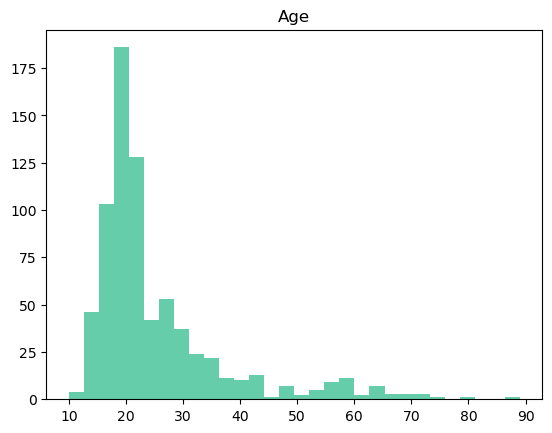

In [13]:
import numpy as np
df.hist(['Age'], bins=30, color='mediumaquamarine',grid=False)

In [15]:
df['Age'].value_counts().loc[lambda x : x>50]

Age
18.0    85
19.0    61
17.0    59
21.0    52
Name: count, dtype: int64

In [17]:
df['Age'].max()

89.0

관찰:
대부분의 사람들이 음악을 듣는 주체는 주로 직장인이며, 약 79%에 해당합니다.

Text(0, 0.5, '')

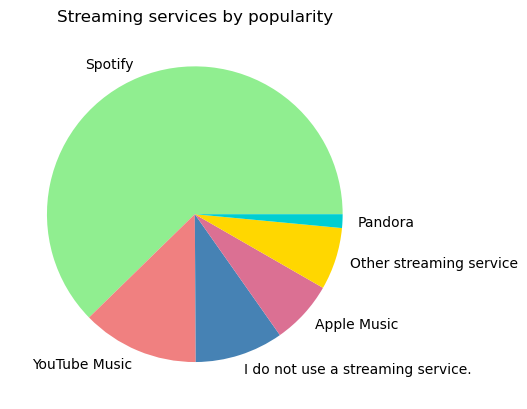

In [20]:
import matplotlib.pyplot as plt

s_colors = ['lightgreen', 'lightcoral', 'steelblue', 'palevioletred', 'gold', 'darkturquoise']

services = df['Primary streaming service'].value_counts()
services.plot(kind='pie', colors = s_colors)

plt.title('Streaming services by popularity')
plt.ylabel("")

In [22]:
df['Primary streaming service'].value_counts(normalize=True)

Primary streaming service
Spotify                              0.623129
YouTube Music                        0.127891
I do not use a streaming service.    0.096599
Apple Music                          0.069388
Other streaming service              0.068027
Pandora                              0.014966
Name: proportion, dtype: float64

C:\Users\geoma\AppData\Local\Temp\ipykernel_11008\3733273024.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bplot = sns.boxplot(data=df, x="Primary streaming service", y = "Age",


Text(0.5, 1.0, 'Streaming services by Age')

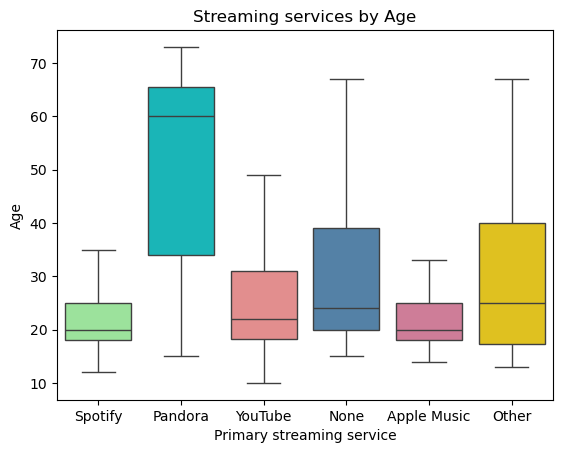

In [26]:
import seaborn as sns

s_colors2 = ['lightgreen', 'darkturquoise', 'lightcoral', 'steelblue', 'palevioletred', 'gold']

df.replace(['Other streaming service', 'I do not use a streaming service.', 'YouTube Music'],
                       ['Other', 'None', 'YouTube'], inplace=True)

bplot = sns.boxplot(data=df, x="Primary streaming service", y = "Age",
            showfliers = False,
            palette = s_colors2)

plt.title('Streaming services by Age')

In [28]:
s_df = df.groupby(['Primary streaming service'])
s_ages = []
s_ages.append(s_df['Age'].median())

s_ages

[Primary streaming service
 Apple Music    20.0
 None           24.0
 Other          25.0
 Pandora        60.0
 Spotify        20.0
 YouTube        22.0
 Name: Age, dtype: float64]

Spotify는 가장 인기 있는 음악 스트리밍 서비스로, 모든 응답자의 62%가 사용하고 있습니다. Spotify는 Apple Music과 함께 다른 스트리밍 플랫폼보다 상대적으로 젊은 사용자층을 보유하고 있습니다. 반면, Pandora는 가장 오래된 사용자층을 가지고 있으며, 평균 사용자 연령은 약 60세입니다.

array([[<Axes: title={'center': 'Hours per day'}>]], dtype=object)

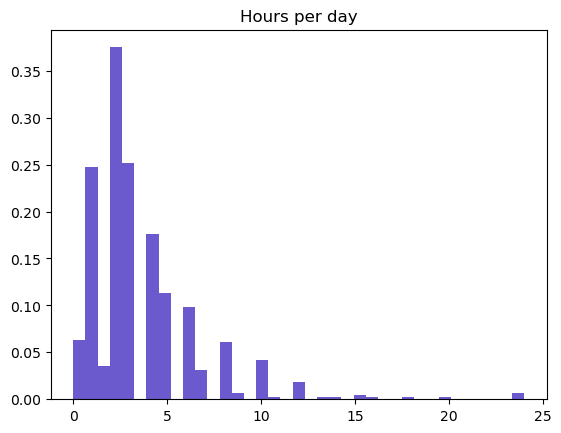

In [31]:
df.hist(['Hours per day'], bins='auto', density=True, color = 'slateblue', grid=False)

In [33]:
df['Hours per day'].value_counts().loc[lambda x : x>100]

Hours per day
2.0    173
3.0    120
1.0    117
Name: count, dtype: int64

대부분의 응답자는 하루에 0-5시간의 음악을 듣습니다. 이 기준을 넘어서면 하루에 5시간 이상 음악을 듣는 응답자의 수가 거의 기하급수적으로 감소합니다. 하루 24시간 음악을 듣는다고 주장하는 몇몇 응답자도 있습니다.

<Axes: ylabel='count'>

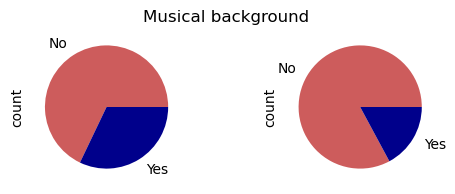

In [36]:
fig = plt.figure(figsize=(6,2))

plt.suptitle("Musical background")

ax = fig.add_subplot(121)

inst = df['Instrumentalist'].value_counts()
inst.plot(kind='pie', colors = ["indianred", "darkblue"], labeldistance = 1.2)

ax = fig.add_subplot(122)

comp = df['Composer'].value_counts()
comp.plot(kind='pie', colors = ["indianred", "darkblue"], labeldistance = 1.2)

대부분의 응답자는 악기를 연주하지 않습니다. 음악을 작곡하는 응답자는 훨씬 더 드뭅니다.

In [45]:
df.replace(['No', 'Yes'],
                       [0, 1], inplace=True)

In [57]:
print(df.head())  # 데이터프레임의 처음 몇 행을 출력
print(df.dtypes)  # 각 열의 데이터 타입을 출력

            Timestamp   Age Primary streaming service  Hours per day  \
0  8/27/2022 19:29:02  18.0                   Spotify            3.0   
1  8/27/2022 19:57:31  63.0                   Pandora            1.5   
2  8/27/2022 21:28:18  18.0                   Spotify            4.0   
3  8/27/2022 21:40:40  61.0                   YouTube            2.5   
4  8/27/2022 21:54:47  18.0                   Spotify            4.0   

   While working  Instrumentalist  Composer         Fav genre  Exploratory  \
0            1.0              1.0       1.0             Latin            1   
1            1.0              0.0       0.0              Rock            1   
2            0.0              0.0       0.0  Video game music            0   
3            1.0              0.0       1.0              Jazz            1   
4            1.0              0.0       0.0               R&B            1   

   Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0                1

Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                   float64
Instrumentalist                 float64
Composer                        float64
Fav genre                        object
Exploratory                       int64
Foreign languages               float64
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object


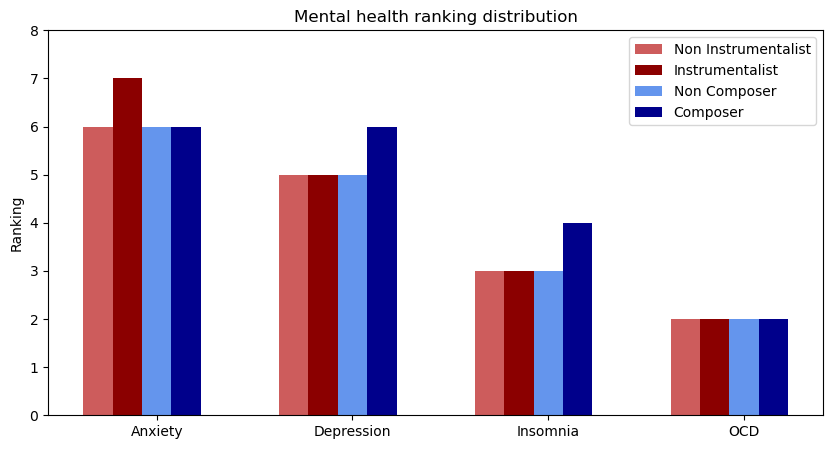

In [59]:
# 예시 데이터프레임 생성 (실제 데이터프레임을 사용하세요)
# df = pd.read_csv('your_data.csv')

# 데이터 타입 확인
print(df.dtypes)

# NaN 값 제거 및 데이터 타입 변환
df = df.dropna(subset=['Anxiety', 'Depression', 'Insomnia', 'OCD', 'Instrumentalist', 'Composer'])

# 각 열의 형식 확인 및 변환
df['Anxiety'] = pd.to_numeric(df['Anxiety'], errors='coerce')
df['Depression'] = pd.to_numeric(df['Depression'], errors='coerce')
df['Insomnia'] = pd.to_numeric(df['Insomnia'], errors='coerce')
df['OCD'] = pd.to_numeric(df['OCD'], errors='coerce')

# 형 변환 후 NaN 값 제거
df = df.dropna(subset=['Anxiety', 'Depression', 'Insomnia', 'OCD'])

# 그래프 데이터 생성
labels = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(10, 5))

# 각 그룹별 median 계산
b1 = ax.bar(x - 2 * width, df[df['Instrumentalist'] == 0][['Anxiety', 'Depression', 'Insomnia', 'OCD']].median().values, width, color='indianred', label="Non Instrumentalist")
b2 = ax.bar(x - width, df[df['Instrumentalist'] == 1][['Anxiety', 'Depression', 'Insomnia', 'OCD']].median().values, width, color='darkred', label="Instrumentalist")
b3 = ax.bar(x, df[df['Composer'] == 0][['Anxiety', 'Depression', 'Insomnia', 'OCD']].median().values, width, color='cornflowerblue', label="Non Composer")
b4 = ax.bar(x + width, df[df['Composer'] == 1][['Anxiety', 'Depression', 'Insomnia', 'OCD']].median().values, width, color='darkblue', label="Composer")

ax.set_ylim([0, 8])
ax.set_ylabel('Ranking')
ax.set_title('Mental health ranking distribution')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

악기를 연주하는 사람들과 작곡가들은 정신 건강(MH) 순위가 약간 더 높습니다. 그러나 OCD 순위는 음악 배경과 관계없이 낮습니다

In [67]:
print(df.head())  # 데이터프레임의 처음 몇 행을 출력
print(df.dtypes)  # 각 열의 데이터 타입을 출력

            Timestamp   Age Primary streaming service  Hours per day  \
0  8/27/2022 19:29:02  18.0                   Spotify            3.0   
1  8/27/2022 19:57:31  63.0                   Pandora            1.5   
2  8/27/2022 21:28:18  18.0                   Spotify            4.0   
3  8/27/2022 21:40:40  61.0                   YouTube            2.5   
4  8/27/2022 21:54:47  18.0                   Spotify            4.0   

   While working  Instrumentalist  Composer         Fav genre  Exploratory  \
0            1.0              1.0       1.0             Latin            1   
1            1.0              0.0       0.0              Rock            1   
2            0.0              0.0       0.0  Video game music            0   
3            1.0              0.0       1.0              Jazz            1   
4            1.0              0.0       0.0               R&B            1   

   Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0                1

Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                   float64
Instrumentalist                 float64
Composer                        float64
Fav genre                        object
Exploratory                       int64
Foreign languages               float64
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object


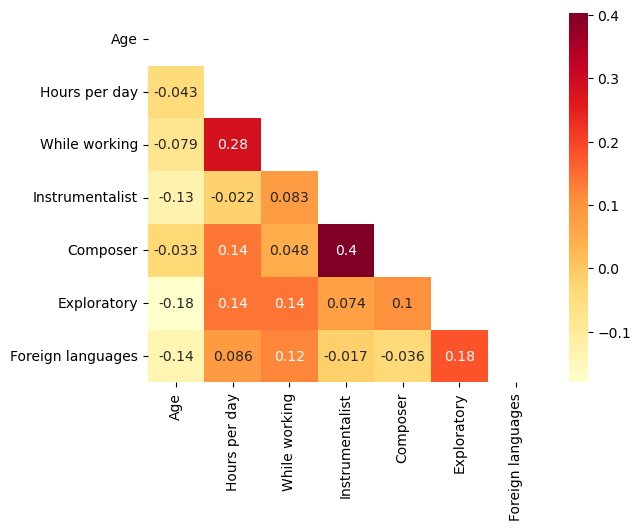

In [69]:
# 예시 데이터프레임 생성 (실제 데이터프레임을 사용하세요)
# df = pd.read_csv('your_data.csv')

# 데이터 타입 확인
print(df.dtypes)

# 숫자형 데이터만 선택
numeric_df = df.select_dtypes(include=[np.number])

# 상관 행렬 계산
corr_m = numeric_df.corr()
corr_m1 = corr_m.iloc[:-5, :-5]  # 마지막 5개의 열을 제외

mask = np.triu(corr_m1)

# 히트맵 그리기
sns.heatmap(corr_m1, annot=True, mask=mask, cmap='YlOrRd')
plt.show()

강한 선형 경향
- 예상대로, 음악을 연주하는 사람과 작곡하는 사람 사이에는 유의미한 상관관계가 있습니다. 마찬가지로, 하루에 음악을 듣는 총 시간과 작업 중 음악을 듣는 시간 사이에도 강한 관계가 있습니다.

약한 선형 경향: 탐색적인 응답자
- 음악을 듣는 시간이 많을수록 새로운 음악을 적극적으로 탐색할 가능성이 높아집니다. 작업 중 음악을 듣는 사람은 새로운 음악을 탐색하고 다양한 언어로 된 음악을 듣는 경향이 더 높습니다. 외국어 음악을 듣는 사람은 새로운 음악을 탐색할 가능성이 더 높습니다. 나이가 많은 사람은 새로운 음악을 탐색하는 경향이 덜합니다.

2. Mental health

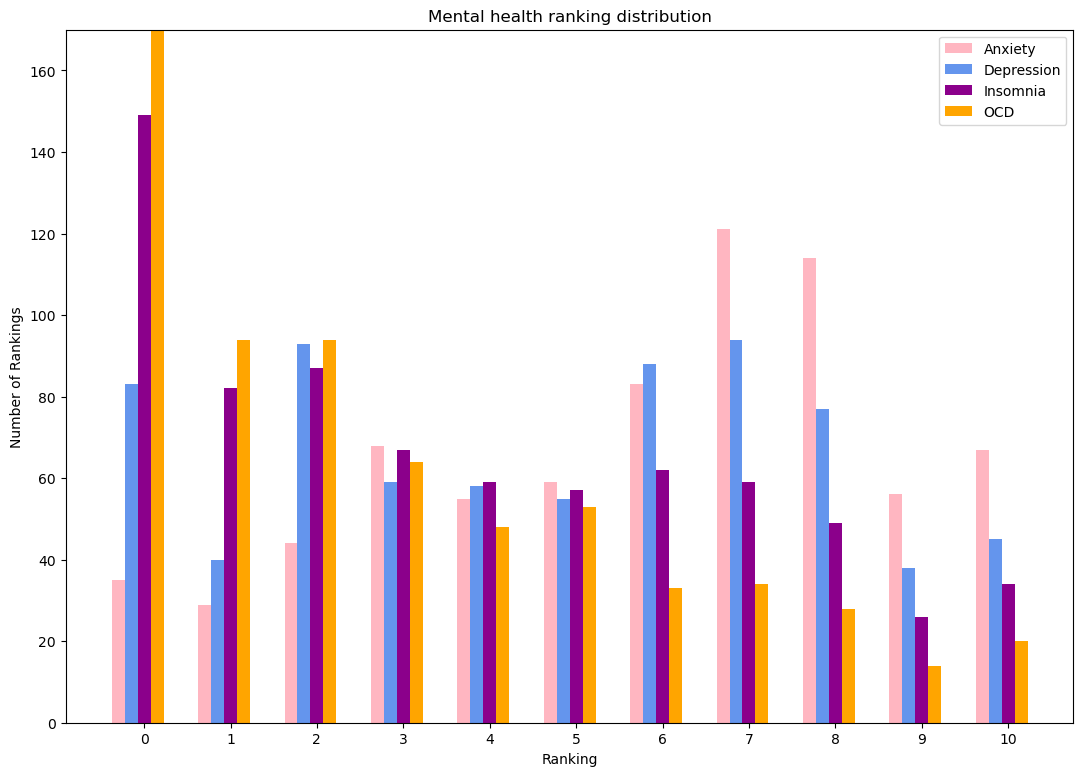

In [75]:
m_all = ["Anxiety", "Depression", "Insomnia", "OCD"]

mental_df = df[m_all]
mental_df.round(0).astype(int)

disorder_count = []
for disorder in m_all:
    x=0
    while x !=11:
        count =  (mental_df[disorder].values == x).sum()
        disorder_count.append(count)
        x +=1

labels = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(13, 9))

b1 = ax.bar(x-2*width, disorder_count[0:11], width, label="Anxiety", color = 'lightpink')
b2 = ax.bar(x-width, disorder_count[11:22], width, label="Depression", color = 'cornflowerblue')
b3 = ax.bar(x, disorder_count[22:33], width, label="Insomnia", color = 'darkmagenta')
b4 = ax.bar(x+width, disorder_count[33:], width, label="OCD", color = 'orange')

ax.set_ylim([0, 170])
ax.set_ylabel('Number of Rankings')
ax.set_xlabel('Ranking')
ax.set_title('Mental health ranking distribution')
ax.set_xticks(x, labels)
ax.legend()

plt.show()

In [79]:
# df 데이터프레임에서 'OCD' 열의 값이 0인 행의 수를 계산하여 출력

max(disorder_count)

248

In [81]:
for disorder in m_all:
    d_avg = str(round(df[disorder].mean(), 2))
    print(disorder + ' average: ' + d_avg)

Anxiety average: 5.84
Depression average: 4.8
Insomnia average: 3.73
OCD average: 2.64


우울증과 불안의 높은 순위는 매우 흔하며, 각각 평균 순위는 5와 6입니다. 각 순위 간의 인기도는 동일한 방향으로 움직이는 것처럼 보입니다(즉, 순위 1에서 2로 갈 때, 불안과 우울증 모두에서 이 순위의 인기가 증가합니다). 흥미롭게도(하지만 우려스럽게도), 특정 개인이 우울증을 0보다 10으로 평가할 가능성이 더 높습니다.

불면증은 다소 흔하며 0 순위 외에 더 공정하게 분포되어 있습니다. 그러나 불면증 순위는 순위가 증가함에 따라 인기도가 감소하는 하향 추세를 보입니다.
0이 최빈값인 OCD는 가장 흔하지 않은 장애입니다. 불면증 순위와 유사하게, OCD 순위가 증가함에 따라 인기도는 감소하는 경향이 있습니다.

Listening time & MH

In [92]:
print(df.head())  # 데이터프레임의 처음 몇 행을 출력
print(df.dtypes)  # 각 열의 데이터 타입을 출력

            Timestamp   Age Primary streaming service  Hours per day  \
0  8/27/2022 19:29:02  18.0                   Spotify            3.0   
1  8/27/2022 19:57:31  63.0                   Pandora            1.5   
2  8/27/2022 21:28:18  18.0                   Spotify            4.0   
3  8/27/2022 21:40:40  61.0                   YouTube            2.5   
4  8/27/2022 21:54:47  18.0                   Spotify            4.0   

   While working  Instrumentalist  Composer         Fav genre  Exploratory  \
0            1.0              1.0       1.0             Latin            1   
1            1.0              0.0       0.0              Rock            1   
2            0.0              0.0       0.0  Video game music            0   
3            1.0              0.0       1.0              Jazz            1   
4            1.0              0.0       0.0               R&B            1   

   Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0                1

In [96]:
print(df.columns)  # 데이터프레임의 모든 열 이름을 출력

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')


In [100]:
print(df.columns)  # 데이터프레임의 모든 열 이름을 출력

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')


낮은 정신 건강(MH) 순위는 0, 1 또는 2로 정의됩니다. 흥미롭게도, 낮은 불면증 순위를 가진 개인들은 극단적인 순위를 가진 개인들에 비해 평균 청취 시간이 현저히 감소하는 것을 보였습니다. 낮은 우울증 순위를 가진 개인들에게서도 마찬가지의 경향이 관찰되었습니다.
또한, 개인이 여러 정신 건강 범주에서 0, 1 또는 2를 응답한 경우, 여러 카테고리에 포함될 수 있음을 유의해야 합니다. 이 도표의 시간 척도가 이전 도표와 다르다는 점도 주의해야 합니다.   
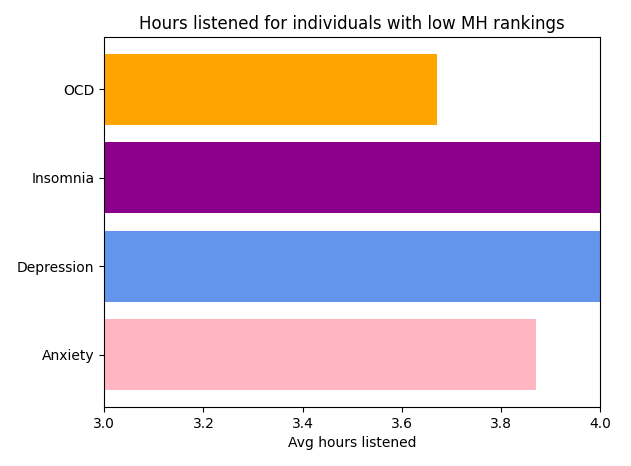

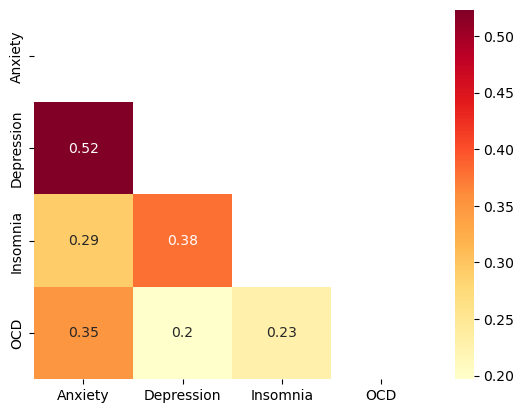

In [112]:
corr_m2 = corr_m.iloc[8: , 8:]
mask = np.triu(corr_m2)

sns.heatmap(corr_m2, annot=True, mask=mask, cmap = 'YlOrRd')
plt.show()

모든 네 가지 장애는 서로 상당한 겹침을 보이며, 우울증과 불안이 가장 강한 선형 상관관계를 나타냅니다. 

이는 "정신 건강 순위 분포" 차트에서의 관찰과 일치합니다.

OCD는 다른 범주와 다소 관련이 있지만, 상관 행렬은 그 관계가 그렇게 강하지 않음을 암시합니다.

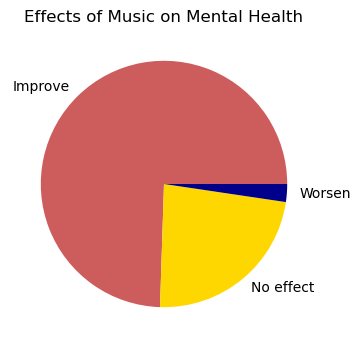

In [122]:
plt.figure(figsize=(5,4))
plt.title('Effects of Music on Mental Health')

effects = df['Music effects'].value_counts()
effects.plot(kind='pie', colors = ["indianred", "gold", "darkblue"], ylabel= '');

In [128]:
effects

Music effects
Improve      540
No effect    168
Worsen        17
Name: count, dtype: int64

대부분의 응답자들은 음악이 정신 건강에 긍정적인 영향을 미친다고 느끼고 있습니다. 

나머지 응답자 중에서 음악이 부정적인 영향을 미친다고 보고한 사람은 단 15명에 불과합니다.

Music genres

Text(0, 0.5, '')

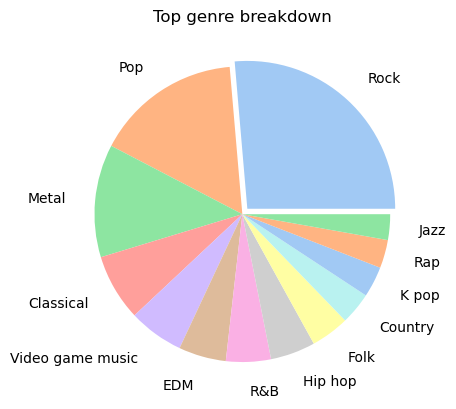

In [134]:
genre = df["Fav genre"].value_counts().loc[lambda x: x>10]
genre.plot(kind='pie', labeldistance = 1.2, 
            explode=[0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,], 
            colors = sns.color_palette('pastel')[0:13])

plt.title('Top genre breakdown')
plt.ylabel("")

록은 가장 인기 있는 장르로, 개인이 가장 좋아하는 장르로 4번 중 1번 선택됩니다. 
인기 측면에서 록은 팝과 메탈이 뒤를 잇습니다. 로파이, 가스펠, 라틴 음악은 0.14% 미만으로 선택되어 위의 원형 차트에는 나타나지 않습니다.

청취 빈도에 따른 장르 분류는 "(In Depth) Genres by Popularity" 도표를 참조하시기 바랍니다.

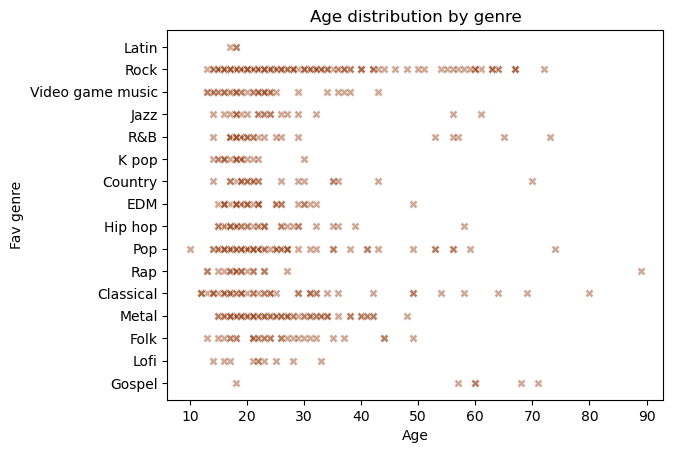

In [137]:
# age and genre

sns.scatterplot(data=df, y="Fav genre", x="Age", alpha = 0.5, marker = "X", color = "sienna")
plt.title('Age distribution by genre');

록은 가장 다양한 연령층을 보유하고 있습니다.0
클래식과 팝 청취자 또한 다른 장르에 비해 더 넓은 연령대를 가지고 있습니다. 

반면, K-pop과 로파이와 같은 일부 음악 장르는 
보다 특정하고 젊은 연령층을 끌어들이는 것으로 보입니다.

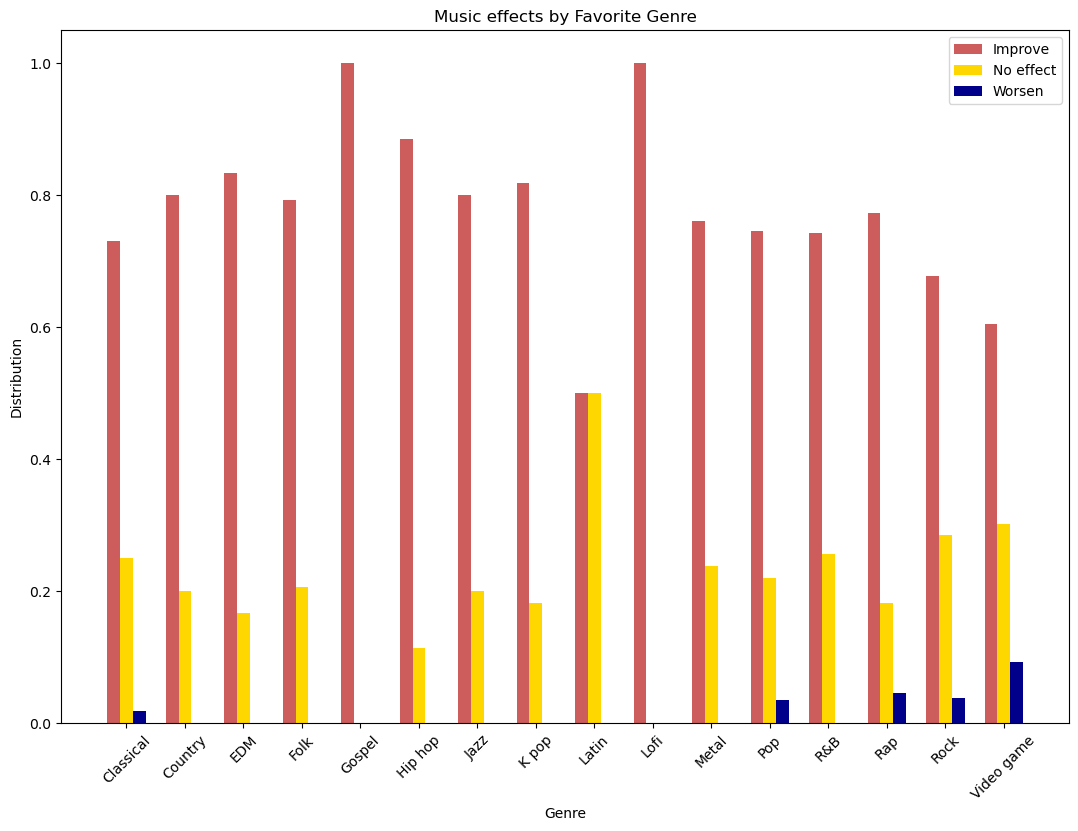

In [142]:
df.replace(['Video game music'],
                       ['Video game'], inplace=True)

g_all = df['Fav genre'].unique()
g_all.sort()
fg_df = df.groupby(['Fav genre'])
fg_dist = fg_df['Music effects'].value_counts(ascending=False, normalize=True).tolist()

insert_indices = [5, 8, 11, 13, 14, 17, 20, 23, 26, 28, 29, 32, 38]
for i in range(len(insert_indices)):
    fg_dist.insert(insert_indices[i], 0)

imp_dist = fg_dist[0::3]
no_eff_dist = fg_dist[1::3]
wors_dist = fg_dist[2::3]

width = 0.22

x = np.arange(len(g_all))

fig, ax = plt.subplots(figsize=(13, 9))

b1 = ax.bar(x-width, imp_dist, width, label="Improve", color = 'indianred')
b2 = ax.bar(x, no_eff_dist, width, label="No effect", color = 'gold')
b3 = ax.bar(x+width, wors_dist, width, label="Worsen", color = 'darkblue')

plt.title("Music effects by Favorite Genre")
ax.set_ylabel('Distribution')
ax.set_xlabel('Genre')
ax.set_xticks(x, g_all, rotation = 45)
ax.legend()

plt.show()

-장르와 관계없이 응답자의 대다수는 음악이 정신 건강에 긍정적인 영향을 미친다고 동의합니다. 이는 "음악이 정신 건강에 미치는 영향" 도표에 의해 뒷받침됩니다.

-복음 음악과 로파이를 가장 좋아하는 응답자들은 모두 음악이 유익하다고 느끼고 있습니다. 

-비디오 게임 음악을 가장 좋아하는 응답자들은 가장 다양한 응답 분포를 보이며, 
이들 중 약 40%는 음악이 전혀 유익하지 않다고 느꼈고, 
10%는 음악이 정신 건강에 부정적인 영향을 미쳤다고 보고했습니다.

-음악이 해롭다고 느낀 다른 응답자는 클래식, 팝, 랩 또는 록 음악을 가장 좋아하는 응답자들뿐입니다.

In [148]:
print(df['BPM'].max())
print(df['BPM'].min())

999999999.0
0.0


설문조사 시스템은 완벽하지 않습니다. 999999999 BPM의 음악을 듣는다고 주장하는 온라인 트롤들이 데이터에 영향을 미칠 수 있습니다.

In [151]:
# filter out noise by creating upper and lower bounds

df = df[(df.BPM < 500) & (df.BPM > 20)]
print(df['BPM'].max())
print(df['BPM'].min())

220.0
40.0


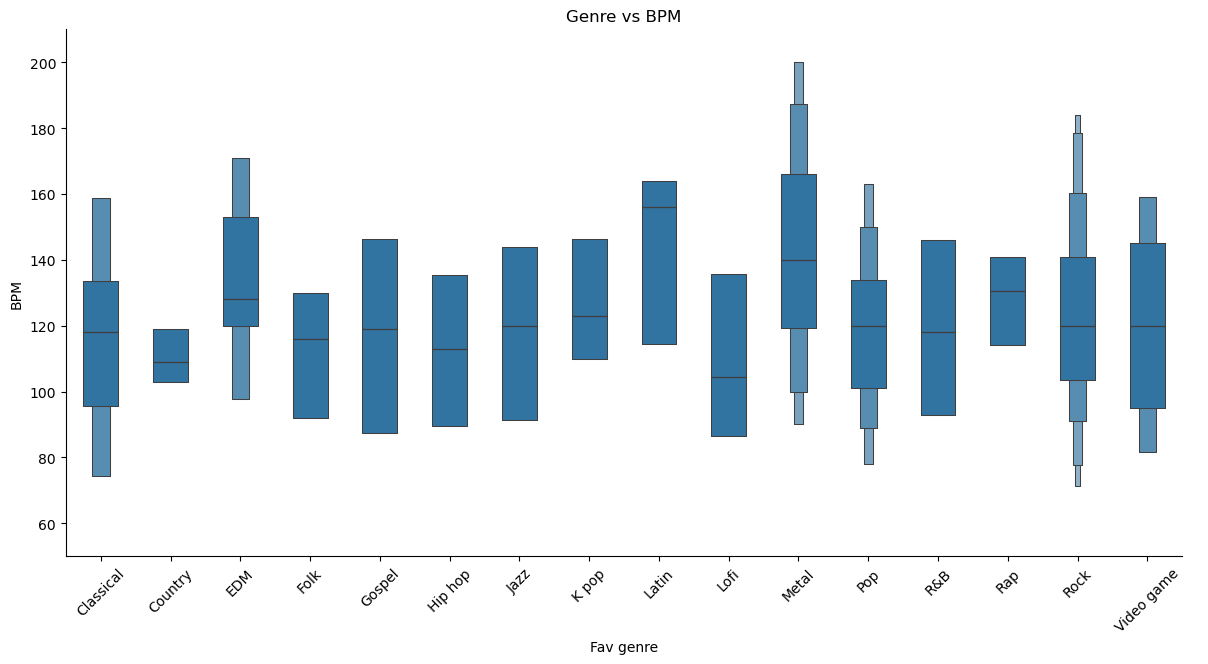

In [153]:
sns.catplot(
    data=df.sort_values("Fav genre"),
    x="Fav genre", y="BPM", kind="boxen",
    height=6, aspect=2,
    width = 0.5,
    showfliers=False,
)

plt.xticks(rotation = 45)
plt.title('Genre vs BPM')
plt.ylim(50, 210)
plt.show()

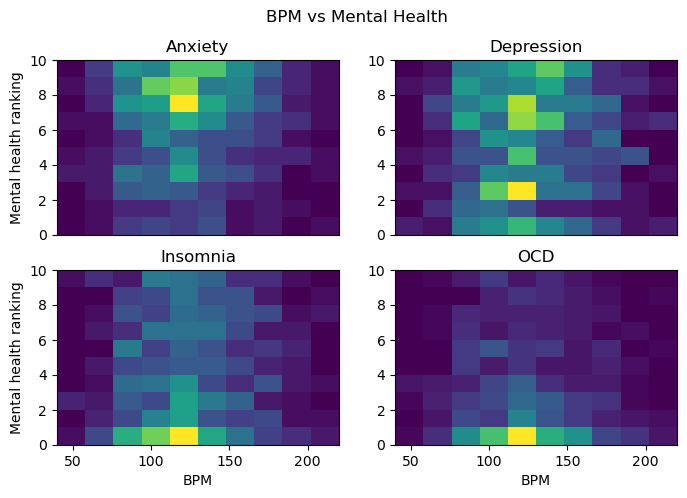

In [155]:
fig = plt.figure(figsize=(8, 5))

plt.suptitle("BPM vs Mental Health")

y = df["Anxiety"]
y2 = df["Depression"]
y3 = df["Insomnia"]
y4 = df["OCD"]
x = df["BPM"]

ax = fig.add_subplot(221)
plt.title('Anxiety')
plt.xticks([])
plt.ylabel('Mental health ranking')
plt.hist2d(x,y, density = True);


ax = fig.add_subplot(222)
plt.title('Depression')
plt.xticks([])
plt.hist2d(x,y2, density = True);

ax = fig.add_subplot(223)
plt.title('Insomnia')
plt.ylabel('Mental health ranking')
plt.xlabel('BPM')
plt.hist2d(x,y3, density = True);

ax = fig.add_subplot(224)
plt.title('OCD')
plt.xlabel('BPM')
plt.hist2d(x,y4, density = True);

In [157]:
df['MH Score'] = df['Anxiety'] + df['Depression'] + df['Insomnia'] + df['OCD']

C:\Users\geoma\AppData\Local\Temp\ipykernel_11008\367325339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MH Score'] = df['Anxiety'] + df['Depression'] + df['Insomnia'] + df['OCD']


In [159]:
df.nsmallest(50, ['MH Score'])['BPM'].mean()

123.26

In [161]:
df.nlargest(50, ['MH Score'])['BPM'].mean()

122.26

BPM과 정신 건강 순위 사이에는 명확한 상관관계가 약합니다.

장르별 분석
장르별로도 정신 건강에 미치는 영향이 다르게 나타날 수 있으며, 각 장르의 특성과 청취자가 느끼는 감정이 복합적으로 작용할 수 있습니다.

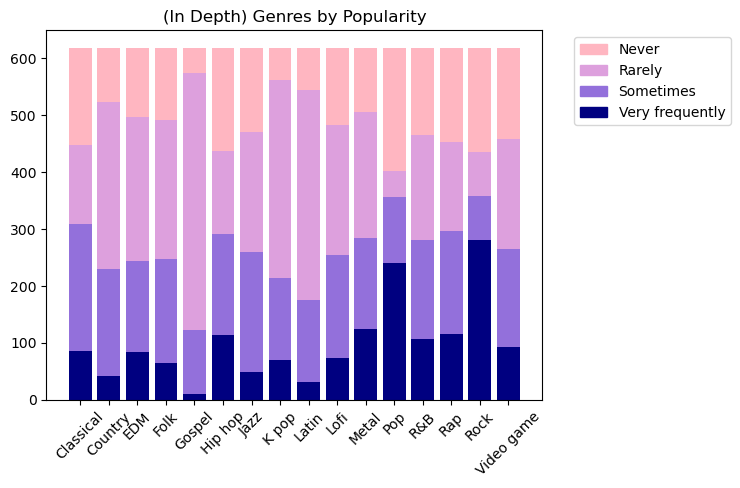

In [164]:
import matplotlib.patches as mpatches

i = 11

r_dist = []
s_dist = []
n_dist = []
vf_dist = []

while i != 27:
    freq_dist = df.iloc[:, i].value_counts().sort_index(ascending=True).tolist()
    r_dist.append(freq_dist[0])
    s_dist.append(freq_dist[1])
    n_dist.append(freq_dist[2])
    vf_dist.append(freq_dist[3])  
    
    i+=1

fig, ax = plt.subplots()

for i in range (0, 16):
    ax.bar(i, r_dist[i], label='Rare', bottom = vf_dist[i] + s_dist[i], color = "plum")
    ax.bar(i, s_dist[i], label='Sometimes', bottom = vf_dist[i], color = "mediumpurple")
    ax.bar(i, n_dist[i], label='Never', bottom=vf_dist[i] + s_dist[i] + r_dist[i], color = "lightpink")
    ax.bar(i, vf_dist[i], label='Very frequently', color = "navy")

ax.set_title('(In Depth) Genres by Popularity')
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
ax.set_xticklabels(g_all)
plt.xticks(rotation = 45)

patch1 = mpatches.Patch(color='lightpink', label='Never')
patch2 = mpatches.Patch(color='plum', label='Rarely')
patch3 = mpatches.Patch(color='mediumpurple', label='Sometimes')
patch4 = mpatches.Patch(color='navy', label='Very frequently')

plt.legend(handles=[patch1, patch2, patch3, patch4], bbox_to_anchor=(1.05, 1.0), loc='upper left');

In [166]:
import itertools

med_list = []
med_list2 = []
med_list3 = []
med_list4 = []

df.replace(['Never', 'Rarely', 'Sometimes', 'Very frequently'],
                        [0, 1, 2, 3], inplace=True)

for i in range (11, 27):
    freq_genre = df.columns[i]
    med_list.append(pd.pivot_table(df, values='Anxiety', index=freq_genre, aggfunc="median").values.tolist())
    med_list2.append(pd.pivot_table(df, values='Depression', index=freq_genre, aggfunc="median").values.tolist())
    med_list3.append(pd.pivot_table(df, values='Insomnia', index=freq_genre, aggfunc="median").values.tolist())
    med_list4.append(pd.pivot_table(df, values='OCD', index=freq_genre, aggfunc="median").values.tolist())

def m_vs_gfreq(mlist, fig_name, bd1, bd2):

    r_dist = []
    s_dist = []
    n_dist = []
    vf_dist = []

    for i in range (0, 16):
        n_dist.append(mlist[i][0])
        r_dist.append(mlist[i][1])  
        s_dist.append(mlist[i][2])  
        vf_dist.append(mlist[i][3])  

    labels = g_all
    x = np.arange(len(labels))
    width = 0.15

    fig, ax = plt.subplots(figsize=(10, 4))

    b1 = ax.bar(x-2*width, list(itertools.chain(*n_dist)), width, label="Never", color = 'lightpink')
    b2 = ax.bar(x-width, list(itertools.chain(*r_dist)), width, label="Rarely", color = 'plum')
    b3 = ax.bar(x, list(itertools.chain(*s_dist)), width, label="Sometimes", color = 'mediumpurple')
    b4 = ax.bar(x+width, list(itertools.chain(*vf_dist)), width, label="Very Frequently", color = 'navy')

    ax.set_ylim(bd1, bd2)
    ax.set_ylabel('Ranking')
    ax.set_title(fig_name)
    ax.set_xticks(x, labels)
    ax.legend(loc='upper left')

    plt.xticks(rotation = 45)
    plt.show()

C:\Users\geoma\AppData\Local\Temp\ipykernel_11008\2484853109.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(['Never', 'Rarely', 'Sometimes', 'Very frequently'],
C:\Users\geoma\AppData\Local\Temp\ipykernel_11008\2484853109.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(['Never', 'Rarely', 'Sometimes', 'Very frequently'],


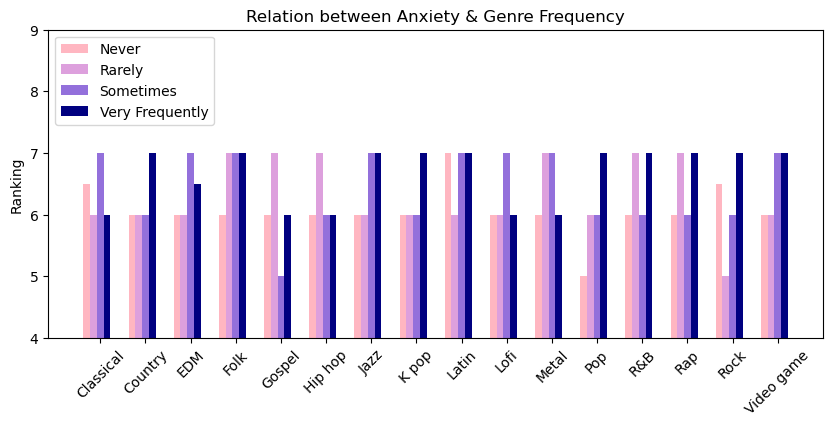

In [168]:
m_vs_gfreq(med_list, 'Relation between Anxiety & Genre Frequency', 4, 9)

대부분의 장르에서는 일관된 관계가 없거나 미미합니다.

-컨트리 음악을 자주 듣는 것과 약간 높은 불안 순위가 상관관계가 있습니다.

-포크 음악을 전혀 듣지 않는 경우는 약간 낮은 불안 순위를 보입니다.

-불안과 팝 음악 청취 빈도 간의 관계가 가장 일관되며, 청취 빈도가 증가할수록 불안 순위도 상승합니다.

-EDM, 재즈, 또는 비디오 게임 음악을 "가끔" 또는 "매우 자주" 선택한 응답자들은 "드물게" 또는 "전혀 듣지 않음"을 선택한 응답자들보다 더 높은 불안 순위를 보고했습니다.


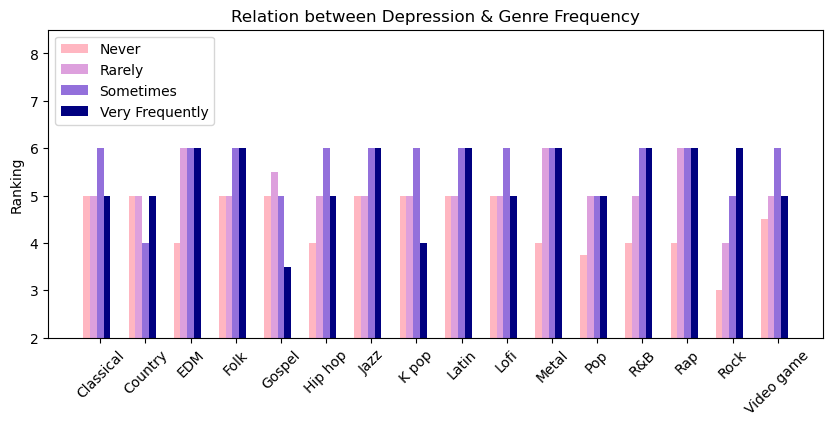

In [173]:
m_vs_gfreq(med_list2, 'Relation between Depression & Genre Frequency', 2, 8.5)

대부분의 장르에서는 일관된 관계가 없거나 미미합니다.

- 복음 음악을 매우 자주 듣는 것과 낮은 우울증 순위 간에는 상관관계가 있습니다.
- EDM, 힙합, 메탈, 랩, 록, 또는 팝 음악을 전혀 듣지 않는 경우는 약간 낮은 우울증 순위를 보입니다.
- 록 음악의 청취 빈도와 우울증, R&B와 우울증 간의 관계가 가장 일관되며, 두 경우 모두 청취 빈도가 증가할수록 우울증 순위도 상승합니다.


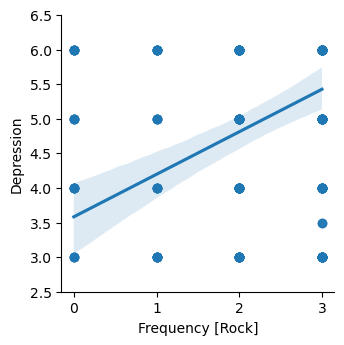

In [179]:
fig = sns.lmplot(x ='Frequency [Rock]', y ='Depression', data = df, height=3.5)
fig.set(ylim=(2.5, 6.5))

-록 음악의 관계를 시각화하기 위해 개별적으로 플롯

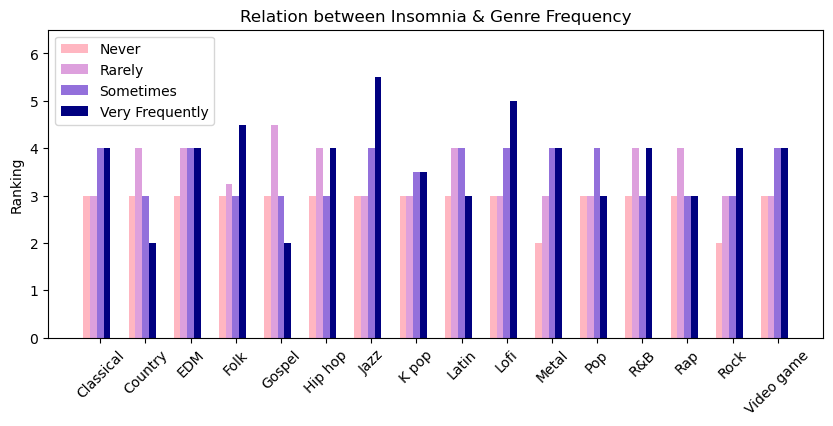

In [183]:
m_vs_gfreq(med_list3, 'Relation between Insomnia & Genre Frequency', 0, 6.5)

- 컨트리와 복음 음악을 매우 자주 듣는 사람들은 낮은 불면증 순위를 보고했습니다.
- 메탈, 로파이, 재즈, 록, 그리고 덜 확연한 경우인 K-pop의 경우, 청취 빈도가 높을수록 불면증 순위가 높아지는 상관관계가 나타났습니다.
- 포크, 재즈, 로파이를 매우 자주 듣는 사람들은 가장 높은 불면증 순위를 보고했습니다.

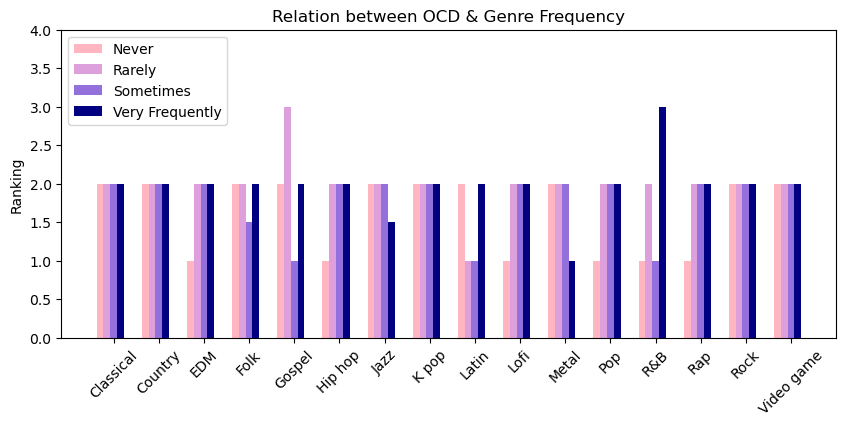

In [186]:
m_vs_gfreq(med_list4, 'Relation between OCD & Genre Frequency', 0,4)

R&B를 매우 자주 듣는 것과 높은 OCD 순위 간에는 상관관계가 있습니다.

In [189]:
print('Favorite genres of highest combined MH scorers:')
df.nlargest(60, ['MH Score'])['Fav genre'].value_counts()

Favorite genres of highest combined MH scorers:


Fav genre
Rock          14
Pop            9
Metal          8
EDM            6
Classical      4
Folk           3
Video game     3
R&B            3
Lofi           3
K pop          2
Jazz           2
Country        1
Hip hop        1
Rap            1
Name: count, dtype: int64

In [191]:
print('Favorite genres of lowest combined MH scorers:')
df.nsmallest(60, ['MH Score'])['Fav genre'].value_counts()

Favorite genres of lowest combined MH scorers:


Fav genre
Rock          12
Metal          9
Pop            8
Classical      6
EDM            4
R&B            4
Country        4
Rap            3
Jazz           3
K pop          3
Folk           1
Video game     1
Latin          1
Gospel         1
Name: count, dtype: int64

장르의 전반적인 인기와 관련하여 "Top genre breakdown" 도표를 참고하세요. 록, 팝, 메탈과 같은 장르는 높은 값으로 예상됩니다.

라틴 음악과 복음 음악이 보고된 가장 좋아하는 장르에서 매우 작은 비율을 차지하는 점은 주목할 만합니다. 이 두 장르가 두 번째 목록에 포함되어 있다는 것은 라틴과 복음 음악이 낮은 정신 건강 점수(MH 점수)와 상당한 상관관계를 가질 가능성이 있음을 시사합니다. 이는 m_vs_gfreq 함수로 생성된 플롯에 의해 어느 정도 뒷받침됩니다.

물론 라틴과 복음 음악 애호가의 인구가 적기 때문에 이러한 결과는 노이즈에 더 민감할 수 있습니다.

컨트리와 랩도 가장 낮은 MH 점수를 가진 그룹에서 더 자주 나타납니다. 반면, EDM은 가장 높은 MH 점수를 가진 그룹에서 약간 더 자주 나타나며, 이는 EDM을 더 자주 듣는 것이 전반적으로 모든 카테고리에서 높은 MH 점수로 이어진다는 점에서 예상되는 결과입니다.

로파이는 두 번째 목록에는 나타나지 않지만 첫 번째 목록에는 세 번 등장하는 점도 흥미롭습니다. "불면증과 장르 빈도 간의 관계" 도표에 따르면, 로파이 애호가들은 불면증을 더 많이 겪는 경향이 있어 이러한 발견을 설명할 수 있습니다.

놀라운 결과
록이 가장 인기 있는 장르로 인정받고 있지만, 그 이상의 값이 surprising하게 보입니다. m_vs_gfreg 플롯에 따르면, 열렬한 록 청취자들은 불면증과 우울증 모두에서 더 높은 순위를 보입니다. 그럼에도 불구하고 록은 두 목록에서 비슷한 값 카운트를 가지고 있습니다.

재즈를 매우 자주 듣는 경우에도 불안, 우울증, 특히 불면증에서 높은 순위를 나타내지만, 재즈 역시 두 목록에서 비슷한 값 카운트를 보입니다.

결론

음악 취향과 정신 건강 간에는 여러 작은 패턴이 존재합니다. 하지만 BPM과 같은 일부 요소는 중요한 역할을 하지 않습니다. 개별 장르는 정신 건강(MH) 카테고리에 따라 다양한 영향을 미칩니다. 예를 들어, 록을 듣는 빈도는 우울증 순위와 더 관련이 있는 반면, 로파이는 불면증 순위와 관련이 있습니다.

따라서 특정 장르를 "가장 위험한" 것으로 간주하는 것은 부정확합니다. 각 장르는 그 자체로 고유한 영향을 미치며, 이를 종합적으로 고려해야 합니다.

In [197]:
df.nlargest(1, ['MH Score'])['Fav genre']

562    Folk
Name: Fav genre, dtype: object

결론

그러나 포크 음악은 가장 높은 정신 건강(MH) 점수를 기록한 응답자가 가장 좋아하는 장르였습니다. (하나의 사례로 인해 전체 데이터셋을 일반화하는 것은 신중히 접근해야 합니다.)

질문들
이 데이터셋은 개선할 여지가 많습니다. 인구통계학적 질문(국가, 성별 등)을 추가하면 더 흥미롭고 유용한 통찰을 제공할 수 있습니다. 이상적으로는 더 많은 사례가 포함되어야 합니다.

또한, 대안 음악과 같은 다른 미포함 장르에 대한 궁금증도 있습니다. 이 비판은 Discord와 Reddit에서 여러 응답자들에 의해 제기되었습니다. 일반적으로, 설문조사는 서양 중심적인 편향을 보였으며, 이는 응답자들에게 제공된 음악 장르에서 확인할 수 있습니다.

마지막으로, 음악 취향으로부터 정신 건강을 예측하거나 그 반대의 가능성을 탐구하고 싶습니다. Uplifting Trance 음악과 정신건강 상관관계를 하겠습니다.
